In [7]:
# pandas : panel data , for easy data manipulation..
import pandas as pd 

# numpy : numerical python extensions, for array manipulation and math operations.
import numpy as np

# decomposition : Package for principal component analysis of scikit learn.
from sklearn.decomposition import PCA

# preprocessing : package to center and normalize data before performing PCA.
from sklearn.preprocessing import StandardScaler

# matplotlib : to draw graphs, plots ...
import matplotlib.pyplot as plt


In [8]:

# import data from our demo dataset file.
demographic_data = pd.read_csv("./nndb_flat1.csv")

# data information
demographic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [9]:

# Head method returns the first 5 rows of data
print( demographic_data.head() )


     ID               FoodGroup              ShortDescrip  \
0  1001  Dairy and Egg Products          BUTTER,WITH SALT   
1  1002  Dairy and Egg Products  BUTTER,WHIPPED,WITH SALT   
2  1003  Dairy and Egg Products      BUTTER OIL,ANHYDROUS   
3  1004  Dairy and Egg Products               CHEESE,BLUE   
4  1005  Dairy and Egg Products              CHEESE,BRICK   

                      Descrip CommonName MfgName ScientificName  Energy_kcal  \
0              Butter, salted        NaN     NaN            NaN        717.0   
1  Butter, whipped, with salt        NaN     NaN            NaN        717.0   
2       Butter oil, anhydrous        NaN     NaN            NaN        876.0   
3                Cheese, blue        NaN     NaN            NaN        353.0   
4               Cheese, brick        NaN     NaN            NaN        371.0   

   Protein_g  Fat_g  ...  Folate_USRDA  Niacin_USRDA  Riboflavin_USRDA  \
0       0.85  81.11  ...        0.0075      0.002625          0.026154   
1   

In [10]:

# The shape attribute returns the dimensions of our demographic_data
print( demographic_data.shape )

# there are 8618 samples and 45 variables


(8618, 45)


In [11]:

# separation of non-numeric variables
# When inplace = True is passed, the data is renamed instead (it doesn't return anything).
# the index for the data, inplace (true): modifies the same DataFrame object without creating another modified one.
demographic_data.set_index('FoodGroup', inplace=True)
demographic_data.set_index('ShortDescrip', inplace=True)
demographic_data.set_index('CommonName', inplace=True)
demographic_data.set_index('MfgName', inplace=True)
demographic_data.set_index('ScientificName', inplace=True)
demographic_data.set_index('Descrip', inplace=True)
  
print(  demographic_data.head()  )


                              ID  Energy_kcal  Protein_g  Fat_g  Carb_g  \
Descrip                                                                   
Butter, salted              1001        717.0       0.85  81.11    0.06   
Butter, whipped, with salt  1002        717.0       0.85  81.11    0.06   
Butter oil, anhydrous       1003        876.0       0.28  99.48    0.00   
Cheese, blue                1004        353.0      21.40  28.74    2.34   
Cheese, brick               1005        371.0      23.24  29.68    2.79   

                            Sugar_g  Fiber_g  VitA_mcg  VitB6_mg  VitB12_mcg  \
Descrip                                                                        
Butter, salted                 0.06      0.0     684.0     0.003        0.17   
Butter, whipped, with salt     0.06      0.0     684.0     0.003        0.13   
Butter oil, anhydrous          0.00      0.0     840.0     0.001        0.01   
Cheese, blue                   0.50      0.0     198.0     0.166        1.

In [12]:

# normalization and centering of data
# mean = 0, variance = 1, samples must be rows otherwise you must transpose them (demographic_data.T)

scaled_demographic_data = StandardScaler().fit_transform(demographic_data)

# round , 2 chiffres significatifs
print (" mean : ", np.round(scaled_demographic_data.mean(), 2))
print (" variance : ", np.round(scaled_demographic_data.std(), 2))


 mean :  0.0
 variance :  1.0


In [13]:
#*** PCA ***

In [14]:

# instantiation of a PCA object to train with our data set, number of components to keep: 3
pca_var = PCA(n_components=3)
pca=pca_var.fit_transform(scaled_demographic_data)


In [15]:

# explained_variance_ratio_ : the eigenvalues of the principal components. (own values)

## explained_variance_ : i.e. the eigenvalues of the covariance matrix
print ( pca_var.explained_variance_ )

# get_covariance() : calculate covariances from the data matrix.
print ( pca_var.get_covariance() )

# explained_variance_ratio_ : array with the variance proportions associated with the axes. (how much information he carries)

# the first 3 eigenvectors represent 77% of the available information, they will be kept
print ( pca_var.explained_variance_ratio_[:3].sum() )
#explained_variance_ratio_: it is a table of the variance of the data explained by each of the 3 principal components


[9.86993423 4.11526684 3.42939355]
[[ 0.60203363  0.00990306  0.00561139 ...  0.0229389   0.00438794
  -0.00472782]
 [ 0.00990306  0.78203952  0.11218038 ...  0.27902966  0.06486945
   0.15832765]
 [ 0.00561139  0.11218038  0.82919898 ...  0.30696558  0.18608328
   0.22811505]
 ...
 [ 0.0229389   0.27902966  0.30696558 ...  1.17861787  0.22853195
   0.29279016]
 [ 0.00438794  0.06486945  0.18608328 ...  0.22853195  0.75691466
   0.16588975]
 [-0.00472782  0.15832765  0.22811505 ...  0.29279016  0.16588975
   0.93799021]]
0.44647625391190526


In [16]:
# *** Graphs of eigenvalues ***

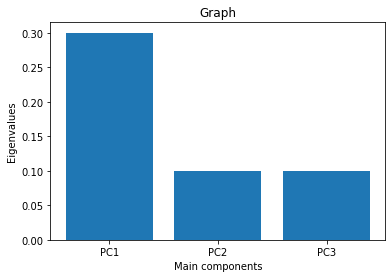

In [17]:

# eigen values
per_var = np.round(pca_var.explained_variance_ratio_,decimals=1)

# creation of labels for the principal components
labels = ['PC' + str(x) for x in range( 1 , len(per_var) +1 ) ]

# graph creation
plt.bar( x=range( 1,len(per_var)+1 ), height=per_var, tick_label=labels)
plt.ylabel('Eigenvalues')
plt.xlabel('Main components')
plt.title('Graph')
plt.show()


In [18]:
#*** Labeling and renaming of components ***

In [19]:

pca = pd.DataFrame(pca[:, :3], index=demographic_data.index)
pca.rename(columns={0:'c1',1:'c2',2:'c3'}, inplace=True)


In [20]:

# we see that the 3 vectors are orthogonal
np.round(pca.corr(), 2)


,c1,c2,c3
c1,1.0,0.0,0.0
c2,0.0,1.0,0.0
c3,0.0,0.0,1.0


In [21]:
#*** Interpretation of components ***

In [22]:
#*** Component one : ***

In [23]:

# copy the 3 components in the vects variable
vects = pca_var.components_[:3]

# pd.Series : One-dimensional array with axis labels
one = pd.Series(vects[0], index=demographic_data.columns)
one.sort_values(ascending=False)

# these values represent the contribution of the initial variables to the construction of the principal components


Riboflavin_mg       0.262418
Riboflavin_USRDA    0.262418
Niacin_USRDA        0.258812
Niacin_mg           0.258812
VitB6_USRDA         0.240501
VitB6_mg            0.240501
Folate_USRDA        0.212681
Folate_mcg          0.212681
Iron_mg             0.207562
Thiamin_USRDA       0.204830
Thiamin_mg          0.204830
Zinc_USRDA          0.187754
Zinc_mg             0.187754
Magnesium_USRDA     0.166954
Magnesium_mg        0.166954
VitB12_USRDA        0.147748
VitB12_mcg          0.147748
Phosphorus_mg       0.147742
Phosphorus_USRDA    0.147742
Copper_mcg          0.140441
Copper_USRDA        0.140441
Calcium_mg          0.118451
Calcium_USRDA       0.118451
Fiber_g             0.112385
Protein_g           0.110871
VitA_USRDA          0.109110
VitA_mcg            0.109110
VitE_USRDA          0.099110
VitE_mg             0.099110
Carb_g              0.098864
Energy_kcal         0.093200
Selenium_mcg        0.075550
Selenium_USRDA      0.075550
VitC_USRDA          0.070313
VitC_mg       

In [24]:
#*** Component two : ***

In [25]:
two = pd.Series(vects[1], index=demographic_data.columns)
two.sort_values(ascending=False)

VitB12_mcg          0.359395
VitB12_USRDA        0.359395
VitA_mcg            0.338235
VitA_USRDA          0.338235
Copper_USRDA        0.306430
Copper_mcg          0.306430
Selenium_USRDA      0.133966
Selenium_mcg        0.133966
Manganese_mg        0.125244
Protein_g           0.121639
Zinc_USRDA          0.048129
Zinc_mg             0.048129
Riboflavin_mg       0.013650
Riboflavin_USRDA    0.013650
Phosphorus_USRDA    0.001109
Phosphorus_mg       0.001109
ID                 -0.004826
Fat_g              -0.017838
VitC_mg            -0.051677
VitC_USRDA         -0.051677
Niacin_mg          -0.058509
Niacin_USRDA       -0.058509
VitE_mg            -0.077676
VitE_USRDA         -0.077676
VitB6_mg           -0.082904
VitB6_USRDA        -0.082904
Magnesium_USRDA    -0.089215
Magnesium_mg       -0.089215
Iron_mg            -0.100613
Calcium_USRDA      -0.105701
Calcium_mg         -0.105701
Energy_kcal        -0.107462
Folate_USRDA       -0.130890
Folate_mcg         -0.130890
Sugar_g       

In [26]:
#*** Component three : ***

In [27]:
three = pd.Series(vects[2], index=demographic_data.columns)
three.sort_values(ascending=False)

Phosphorus_mg       0.364788
Phosphorus_USRDA    0.364788
Calcium_USRDA       0.297885
Calcium_mg          0.297885
Magnesium_mg        0.283037
Magnesium_USRDA     0.283037
Protein_g           0.149814
Energy_kcal         0.147061
Fiber_g             0.138098
Fat_g               0.136457
Selenium_mcg        0.120648
Selenium_USRDA      0.120648
Copper_mcg          0.102994
Copper_USRDA        0.102994
VitE_mg             0.047504
VitE_USRDA          0.047504
Manganese_mg        0.035313
Zinc_mg             0.034348
Zinc_USRDA          0.034348
ID                  0.027241
Iron_mg             0.014128
Carb_g              0.011156
Sugar_g            -0.036566
VitA_USRDA         -0.063956
VitA_mcg           -0.063956
VitB12_mcg         -0.065610
VitB12_USRDA       -0.065610
VitC_USRDA         -0.086795
VitC_mg            -0.086795
VitB6_USRDA        -0.123685
VitB6_mg           -0.123685
Thiamin_mg         -0.143978
Thiamin_USRDA      -0.143978
Niacin_USRDA       -0.145737
Niacin_mg     